In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import openpyxl
%matplotlib inline

In [2]:
df = pd.read_excel("online_retail_II.xlsx")

In [3]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [4]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [5]:
#minimum for price and quantity is negative - possible returns?

In [6]:
df.describe(include = 'O')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [7]:
#invoice considered as a string

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [9]:
df[df['Customer ID'].isna()].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [10]:
#probably best to remove data with no customer ID as segmentation of such customers will not be possible

In [11]:
df[df['Quantity'] < 0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [12]:
#invoice contains the letter "C" at the beginning indicating cancellation of orders

In [13]:
df['Invoice'] = df['Invoice'].astype('str')

df[df['Invoice'].str.match("^\\d{6}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [14]:
#check to see if the invoice begins with any other letter apart from "C"
df['Invoice'].str.replace("[0-9]", "", regex = True).unique()

array(['', 'C', 'A'], dtype=object)

In [15]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [16]:
#only 3 transactions that look like accounting adjustments
#best to drop these

In [17]:
#checking if stock codes are always 5 digit codes or not
df['StockCode'] = df['StockCode'].astype('str')

df[df['StockCode'].str.match("^\\d{5}$") == False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


In [18]:
#a lot of transactions with a stock code of 5 digits followed by a letter making it fair to assume that the transactions are legit.
#let's explore for any other kind of stock codes just in case

df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [19]:
#how many such stock codes exist?
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].nunique()

55

In [20]:
#how many such stock codes exist?
df[(df['StockCode'].str.match("^\\d{5}$") == False) & (df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [21]:
#multiple such stock codes. It'll be very time taking to go through them one by one so let's take a look at one for example

df[df["StockCode"].str.contains("^POST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


In [22]:
#pretty obvious that it can be excluded as we're not interested in postage 
#similar patterns to be found in other stock codes as well
#for now the only interesting seems to be "PADS"

df[df["StockCode"].str.contains("^PADS")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


# Data Cleaning

In [23]:
cleaned_df = df.copy()

In [24]:
#filtering out transactions that don't follow the invoice patters

cleaned_df['Invoice'] = cleaned_df['Invoice'].astype('str')

clean1 =  (cleaned_df['Invoice'].str.match("^\\d{6}$") == True)

cleaned_df = cleaned_df[clean1]

In [25]:
#filtering out transactions that don't follow the stock code patters

cleaned_df['StockCode'] = cleaned_df['StockCode'].astype('str')

clean2 = (
    (cleaned_df['StockCode'].str.match("^\\d{5}$") == True)
    |(cleaned_df['StockCode'].str.match("^\\d{5}[a-zA-Z]+$") == True)
    |(cleaned_df['StockCode'].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[clean2]

In [26]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.000000,512796,512796.000000,406337.000000
mean,11.001279,2010-06-28 18:26:52.709732352,3.391447,15373.632992
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-21 13:27:00,1.250000,14004.000000
50%,3.000000,2010-07-06 14:25:00,2.100000,15326.000000
75%,10.000000,2010-10-15 14:50:00,4.210000,16814.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,104.352433,NaN,5.067864,1677.365907


In [27]:
#minimum price is now zero however, minimum quantity is still negative and customer ID count is still low.

In [28]:
cleaned_df.dropna(subset = ['Customer ID'], inplace = True)

In [29]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [30]:
len(cleaned_df[cleaned_df['Price'] == 0])

28

In [31]:
cleaned_df = cleaned_df[cleaned_df['Price'] > 0]

In [32]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [33]:
#how much data have we dropped so far
(1 - round(len(cleaned_df)/len(df), 2))*100

23.0

In [34]:
#approximately 23% of the records have been dropped

# Feature Engineering

In [35]:
# creating a total sales vairable

cleaned_df['Total Sales'] = cleaned_df['Quantity'] * cleaned_df['Price']

In [36]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [37]:
aggregated_df = cleaned_df.groupby(by = 'Customer ID', as_index = False).agg(
    Monetary_Value = ("Total Sales", "sum"),
    Frequency = ("Invoice", "nunique"),
    Last_Invoice_Date = ("InvoiceDate", "max")
)

In [38]:
aggregated_df.head()

,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00


In [39]:
#finding recency of orders

max_invoice_date = aggregated_df["Last_Invoice_Date"].max()

aggregated_df['Recency'] = (max_invoice_date - aggregated_df['Last_Invoice_Date']).dt.days

In [40]:
aggregated_df

,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10
...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17
4281,18284.0,411.68,1,2010-10-04 11:33:00,66
4282,18285.0,377.00,1,2010-02-17 10:24:00,295
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111


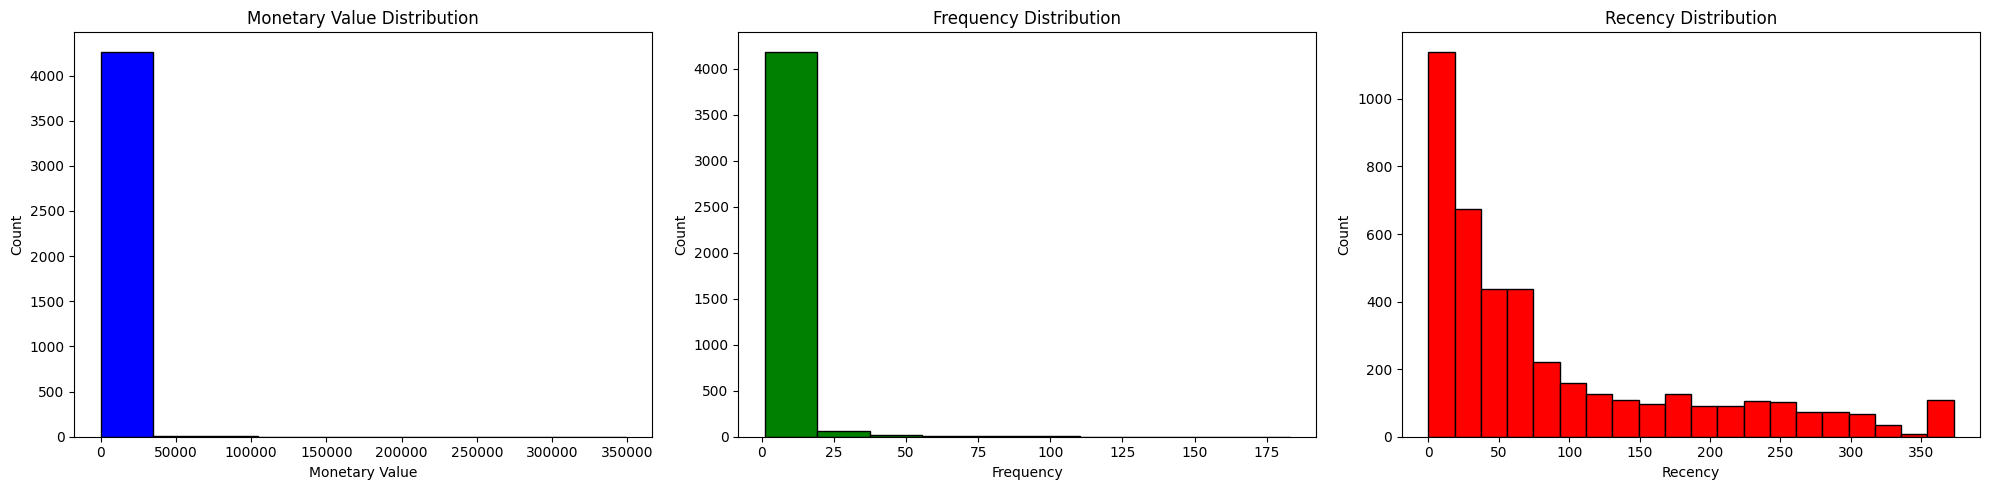

In [41]:
#plotting our features

plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['Monetary_Value'], color = 'blue', edgecolor = 'black', bins = 10)
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], color = 'green', edgecolor = 'black', bins = 10)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], color = 'red', edgecolor = 'black', bins = 20)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()

In [42]:
# for both Monetary Value and Frequency we can see that the distribution is heavily skewed with a few outliers however it is not the so in the case of Recency

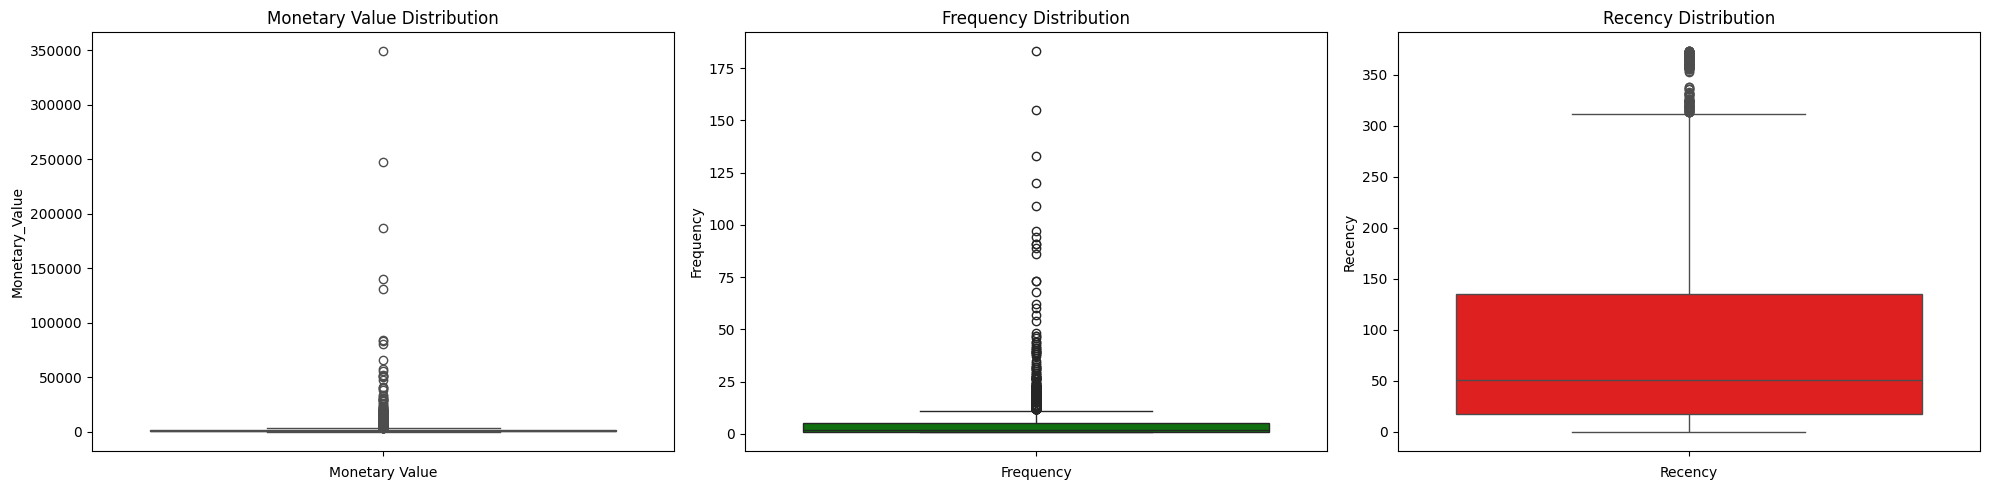

In [43]:
#plotting our features

plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(aggregated_df['Monetary_Value'], color = 'blue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df['Frequency'], color = 'green')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df['Recency'], color = 'red')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()

In [44]:
#the box plot confirms our earlier observation regarding the presence of outliers in Monetary Value and Frequency

In [45]:
#taking a closer look at the outliers

M_Q1 = aggregated_df['Monetary_Value'].quantile(0.25)
M_Q3 = aggregated_df['Monetary_Value'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

m_outliers_df = aggregated_df[(aggregated_df['Monetary_Value'] > (M_Q3 + M_IQR*1.5)) | (aggregated_df["Monetary_Value"] < (M_Q1 - M_IQR * 1.5))].copy()

m_outliers_df.describe()

,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [46]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

f_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + F_IQR * 1.5)) | (aggregated_df["Frequency"] < (F_Q1 - F_IQR * 1.5))].copy()

f_outliers_df.describe()

,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [47]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(m_outliers_df.index)) & (~aggregated_df.index.isin(f_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


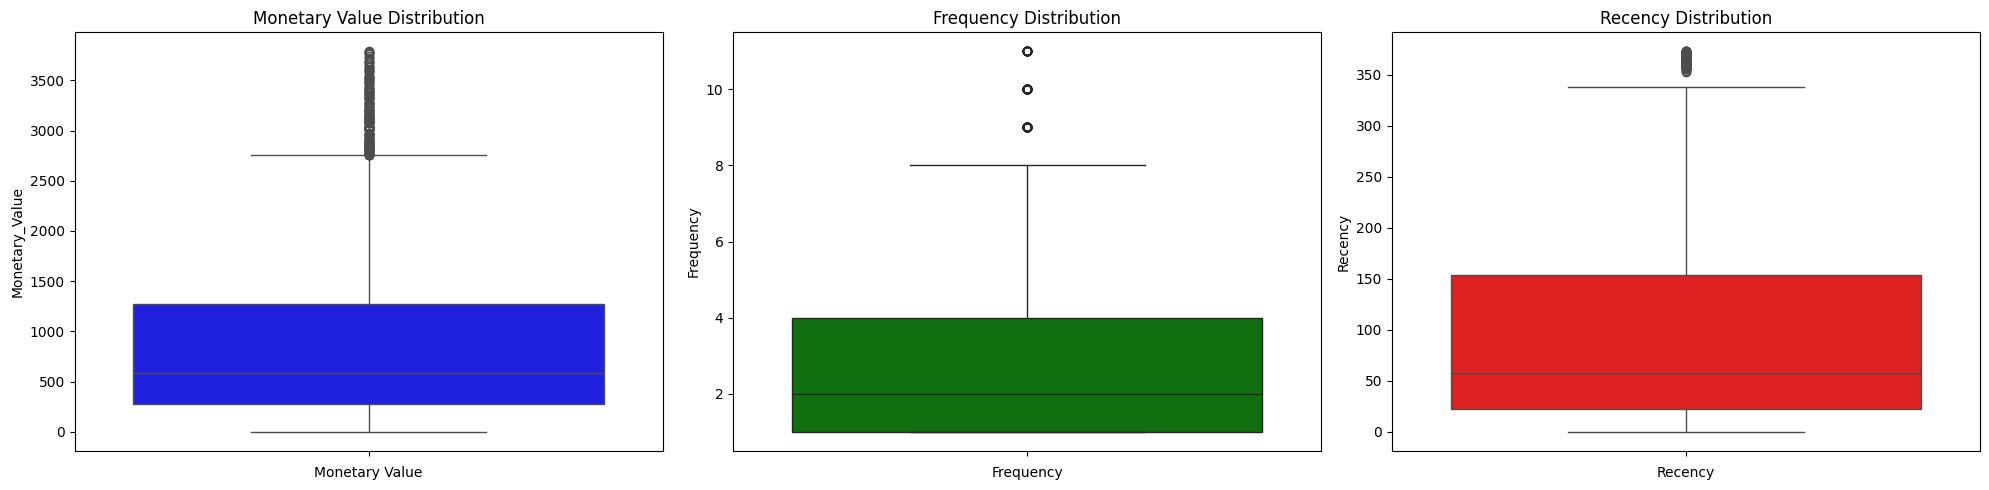

In [48]:
#plotting our features after removing the outliers

plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(non_outliers_df['Monetary_Value'], color = 'blue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(non_outliers_df['Frequency'], color = 'green')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(non_outliers_df['Recency'], color = 'red')
plt.title('Recency Distribution')
plt.xlabel('Recency')

plt.tight_layout()

In [49]:
# we still have some outliers present in our dataset however, it's a lot less than before and easier to work with

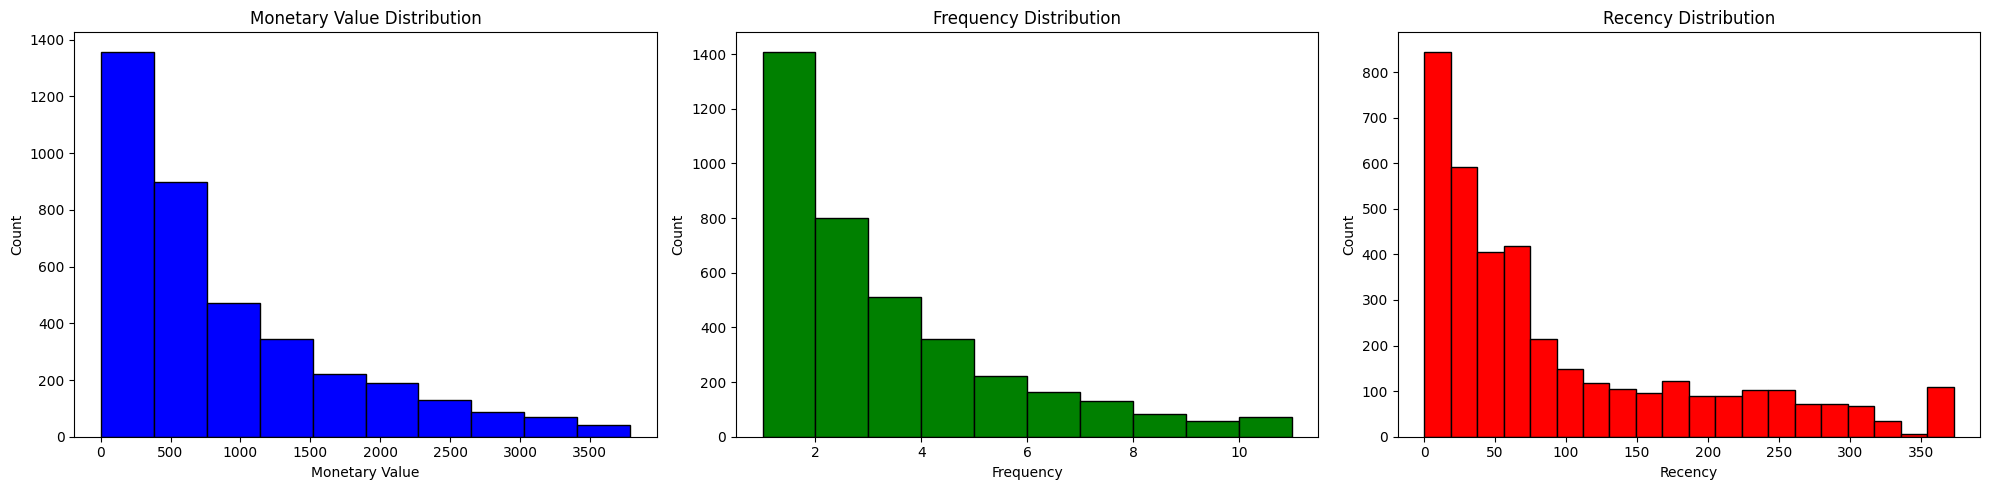

In [50]:
plt.figure(figsize = (20, 5))

plt.subplot(1, 3, 1)
plt.hist(non_outliers_df['Monetary_Value'], color = 'blue', edgecolor = 'black', bins = 10)
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(non_outliers_df['Frequency'], color = 'green', edgecolor = 'black', bins = 10)
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(non_outliers_df['Recency'], color = 'red', edgecolor = 'black', bins = 20)
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()

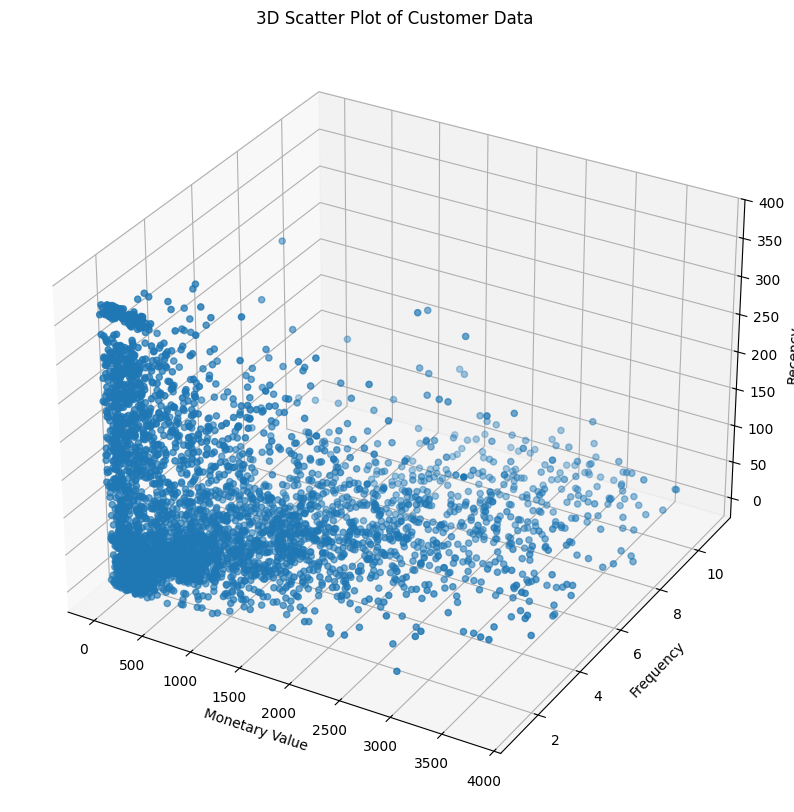

In [51]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['Monetary_Value'], non_outliers_df['Frequency'], non_outliers_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [52]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaled_data = scaler.fit_transform(non_outliers_df[['Monetary_Value', 'Frequency', 'Recency']])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [55]:
scaled_data_df = pd.DataFrame(scaled_data, index = non_outliers_df.index, columns = ('Monetary_Value', 'Frequency', 'Recency'))
scaled_data_df

,Monetary_Value,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


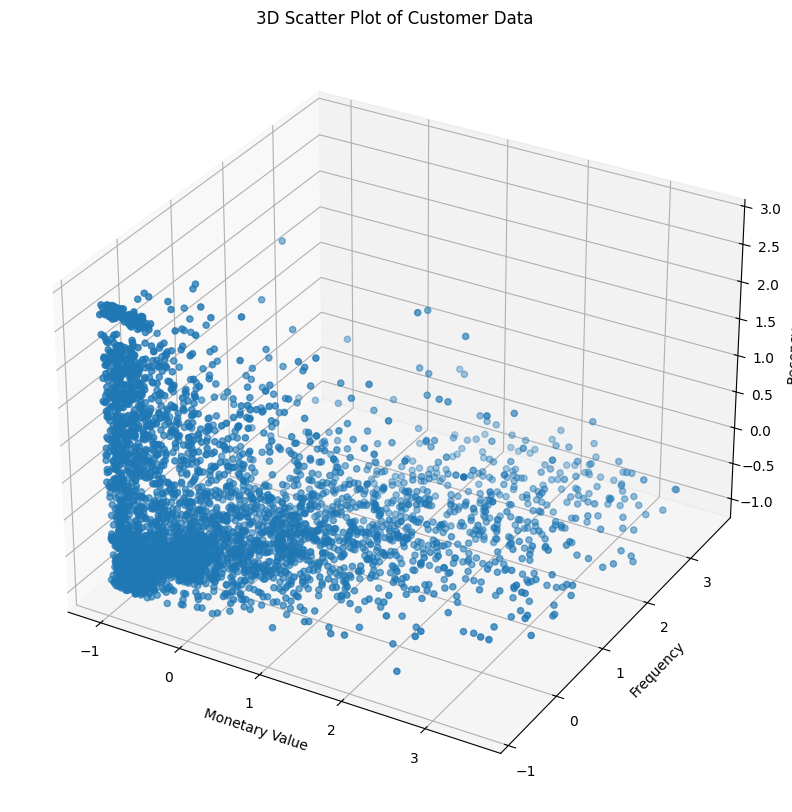

In [56]:
#plotting the data after scaling
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(scaled_data_df['Monetary_Value'], scaled_data_df['Frequency'], scaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [57]:
#we can see that despite scaling the data our graph looks the same as before but our scales match each other now

In [58]:
mxscaler = MinMaxScaler()

In [59]:
mxscaled_data = mxscaler.fit_transform(non_outliers_df[['Monetary_Value', 'Frequency', 'Recency']])

mxscaled_data

array([[0.0443161 , 0.1       , 0.43967828],
       [0.34905959, 0.1       , 0.00536193],
       [0.0579957 , 0.        , 0.19571046],
       ...,
       [0.0991507 , 0.        , 0.79088472],
       [0.3287541 , 0.1       , 0.29758713],
       [0.60585318, 0.3       , 0.04557641]])

In [60]:
mxscaled_data_df = pd.DataFrame(mxscaled_data, index = non_outliers_df.index, columns = ('Monetary_Value', 'Frequency', 'Recency'))
mxscaled_data_df

,Monetary_Value,Frequency,Recency
0,0.044316,0.1,0.439678
1,0.349060,0.1,0.005362
2,0.057996,0.0,0.195710
3,0.586160,0.1,0.112601
4,0.079062,0.0,0.026810
...,...,...,...
4280,0.169072,0.5,0.045576
4281,0.108309,0.0,0.176944
4282,0.099151,0.0,0.790885
4283,0.328754,0.1,0.297587


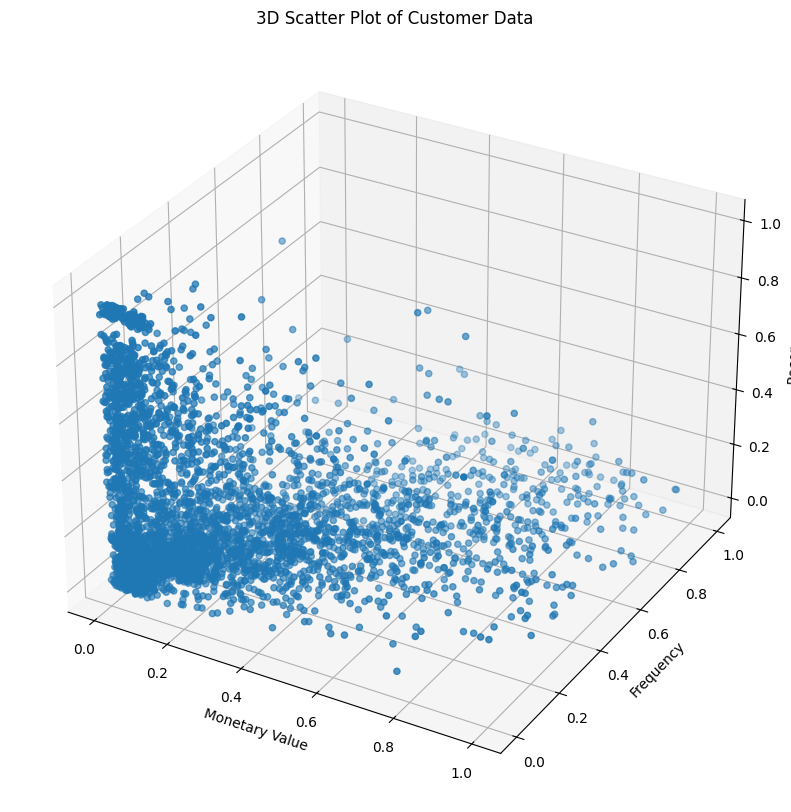

In [61]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(mxscaled_data_df['Monetary_Value'], mxscaled_data_df['Frequency'], mxscaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [62]:
rscaler = RobustScaler()

rscaled_data = rscaler.fit_transform(non_outliers_df[['Monetary_Value', 'Frequency', 'Recency']])

rscaled_data

array([[-0.4232869 ,  0.        ,  0.8030303 ],
       [ 0.7433427 ,  0.        , -0.42424242],
       [-0.37091817, -0.33333333,  0.11363636],
       ...,
       [-0.21336717, -0.33333333,  1.79545455],
       [ 0.66560851,  0.        ,  0.40151515],
       [ 1.7264088 ,  0.66666667, -0.31060606]])

In [63]:
rscaled_data_df = pd.DataFrame(rscaled_data, index = non_outliers_df.index, columns = ('Monetary_Value', 'Frequency', 'Recency'))
rscaled_data_df

,Monetary_Value,Frequency,Recency
0,-0.423287,0.000000,0.803030
1,0.743343,0.000000,-0.424242
2,-0.370918,-0.333333,0.113636
3,1.651020,0.000000,-0.121212
4,-0.290272,-0.333333,-0.363636
...,...,...,...
4280,0.054310,1.333333,-0.310606
4281,-0.178306,-0.333333,0.060606
4282,-0.213367,-0.333333,1.795455
4283,0.665609,0.000000,0.401515


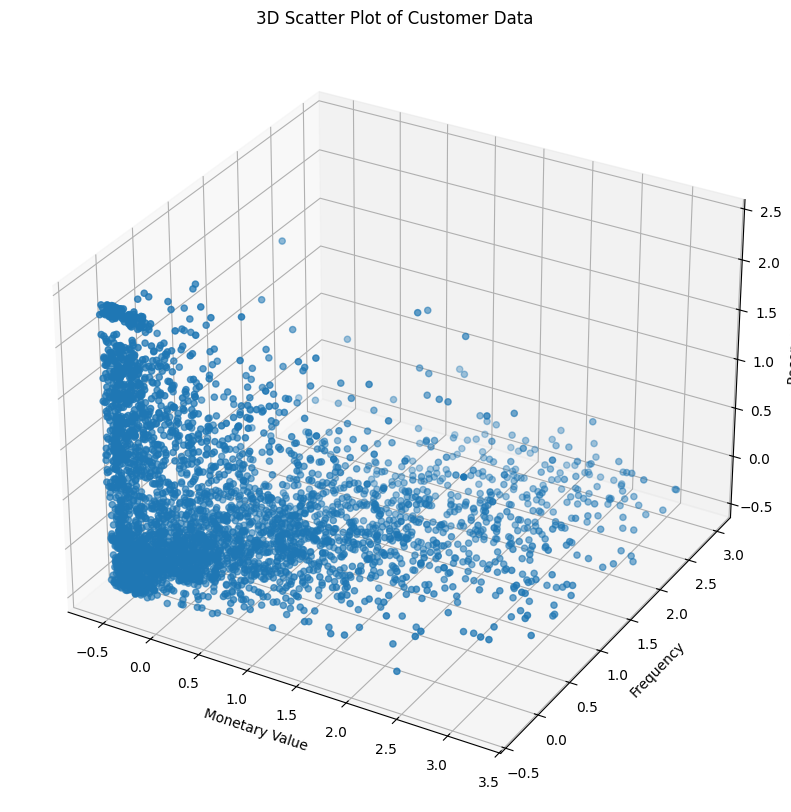

In [64]:
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(rscaled_data_df['Monetary_Value'], rscaled_data_df['Frequency'], rscaled_data_df['Recency'])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# K Means Clustering

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [66]:
# finding the optimum number of clusters using the elbow method
max_k = 11

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters = k, random_state = 42, max_iter = 1000)

    cluster_labels = kmeans.fit_predict(rscaled_data_df)

    sil_score = silhouette_score(rscaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

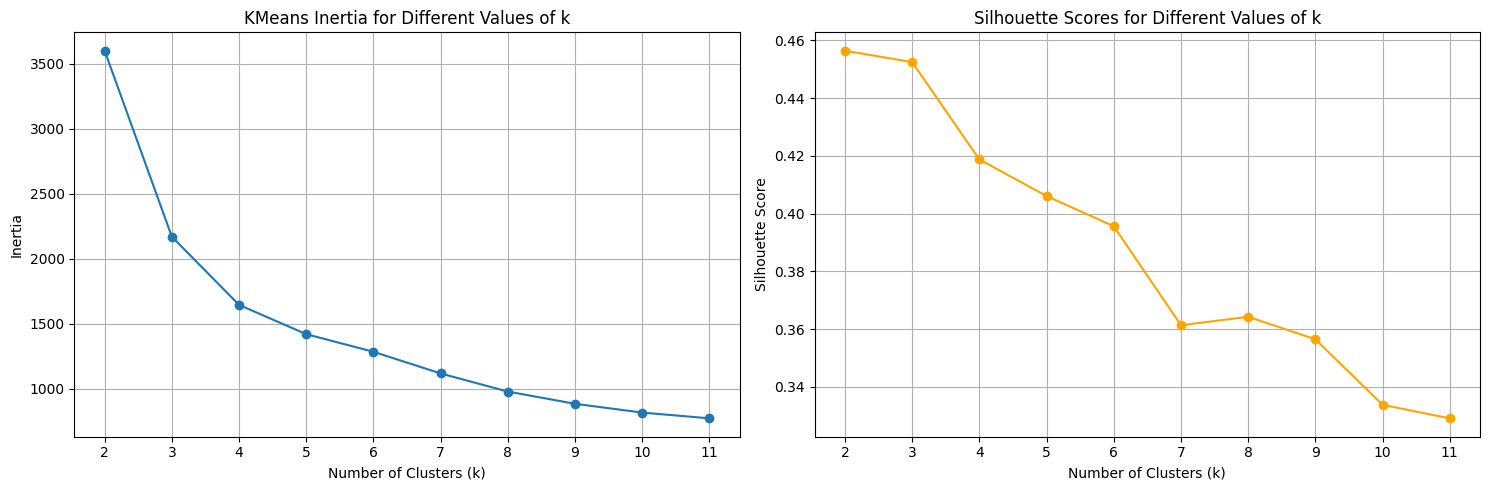

In [67]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker = 'o', color = 'orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [68]:
# the elbow curve suggests that there should be either 4 or 5 clusters as the curve seems to flatten after those points
# but we can see that the silhoutte score for 4 clusters is higher than that of 5 clusters suggesting that there is less overlap of records when the number of clusters is 4.
# hence, we'll go ahead with 4 clusters

In [69]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(rscaled_data_df)

cluster_labels

array([1, 2, 3, ..., 1, 2, 2], dtype=int32)

In [70]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

/var/folders/4d/9j99tx5543j_yj5yhz5lzxvm0000gn/T/ipykernel_2242/3577770544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,2
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,2
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,3
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,2


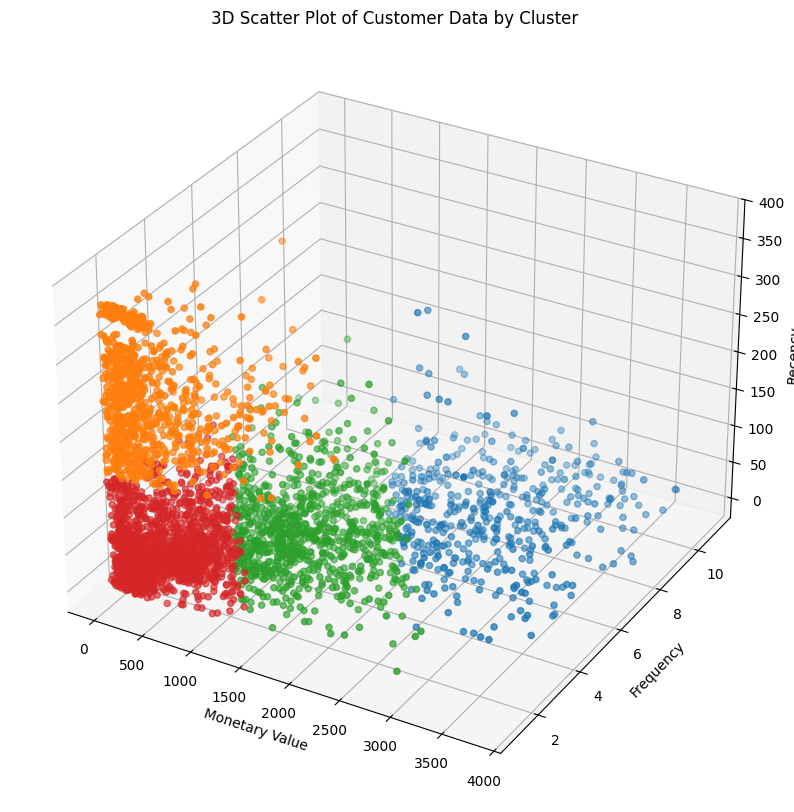

In [71]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(non_outliers_df['Monetary_Value'], non_outliers_df['Frequency'], non_outliers_df['Recency'], c = colors, marker = 'o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

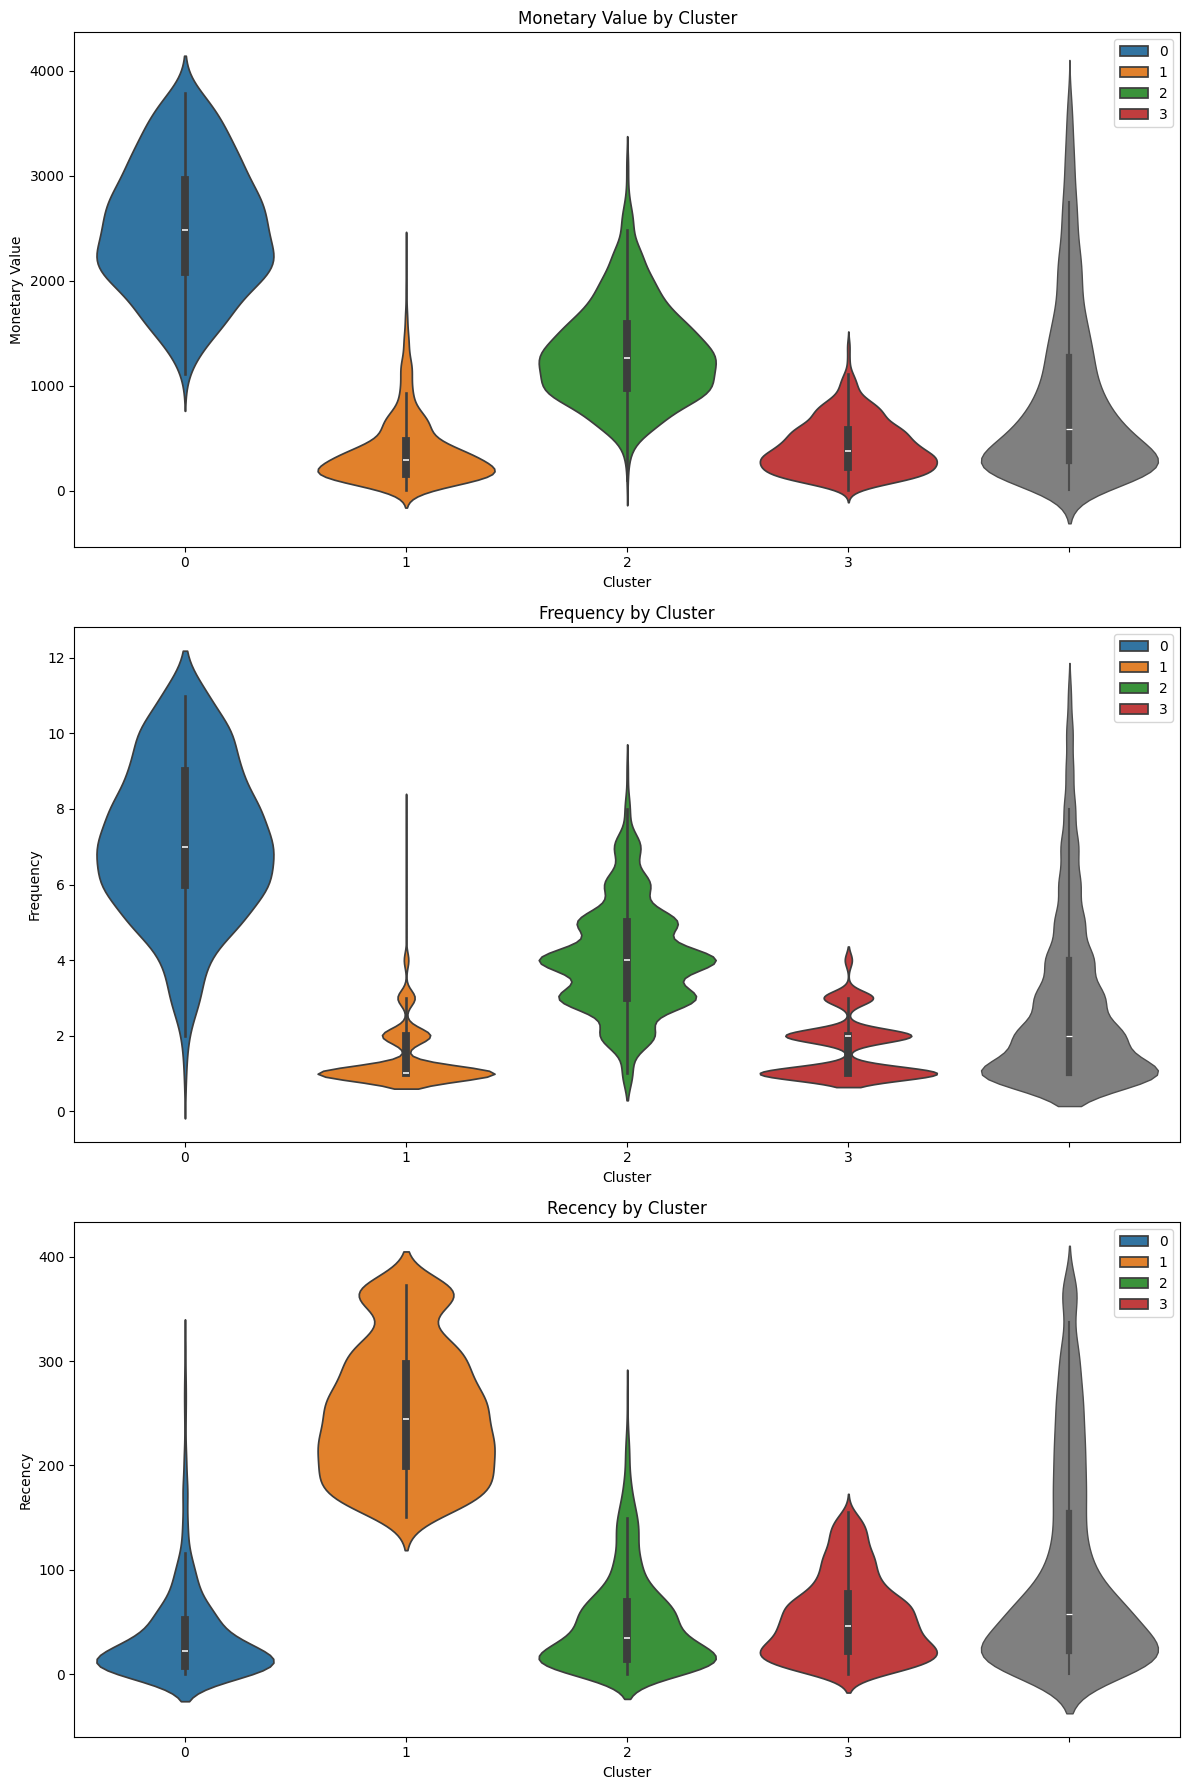

In [72]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['Monetary_Value'], palette = cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df['Monetary_Value'], color = 'gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['Frequency'], palette = cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df['Frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x = non_outliers_df['Cluster'], y = non_outliers_df['Recency'], palette = cluster_colors, hue = non_outliers_df["Cluster"])
sns.violinplot(y = non_outliers_df['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


Cluster explanation

1. Cluster 0 (Blue): "Loyals"
These are the most loyal, high value and frequent customers of the business. They must be provided with personalised exclusive offers to keep them engaged.

2. Cluster 1 (Orange): "Re-Engage"
These are the low value customers who are infrequent and haven't made a purchase recently. In order to re-engage them -  special discounts are marketing campaigns should be used.

3. Cluster 2 (Green): "Retain"
These also form a loyal chunk of customers for us. They are also high value and frequent customers, however they haven't made a purchase recently. To retain them, the focus should be to provide special "loyalty discounts" and other personalised offers.

4. Cluster 3 (Red): "Nurture" 
These are the least active and lowest-value customers, but they have made recent purchases. By providing excellent customer service and offering incentives to encourage more frequent purchases we can keep them engaged with the business.

In [74]:
#dealing with outliers

overlap_outliers = m_outliers_df.index.intersection(f_outliers_df.index)

m_outliers_only_df = m_outliers_df.drop(overlap_outliers)
f_outliers_only_df = f_outliers_df.drop(overlap_outliers)
mnf_outliers_df = m_outliers_df.loc[overlap_outliers]

In [75]:
m_outliers_only_df['Cluster'] = -1
f_outliers_only_df['Cluster'] = -2
mnf_outliers_df['Cluster'] = -3

outliers_df = pd.concat([m_outliers_only_df, f_outliers_only_df, mnf_outliers_df])

outliers_df

,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


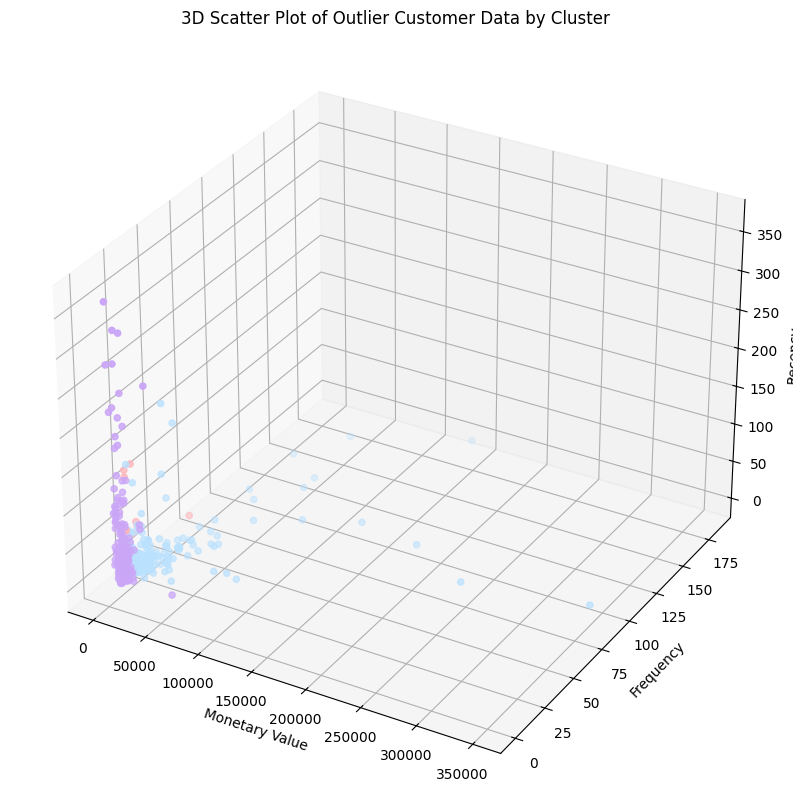

In [83]:
#scatter plot for outliers
cluster_colors = {-1: '#cba6f7',  # baby purple
                  -2: '#ffb3ba',  # baby pink
                  -3: '#bae1ff'}  # light blue

colors = outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(projection = '3d')

scatter = ax.scatter(outliers_df['Monetary_Value'], outliers_df['Frequency'], outliers_df['Recency'], c = colors, marker = 'o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Outlier Customer Data by Cluster')

plt.show()

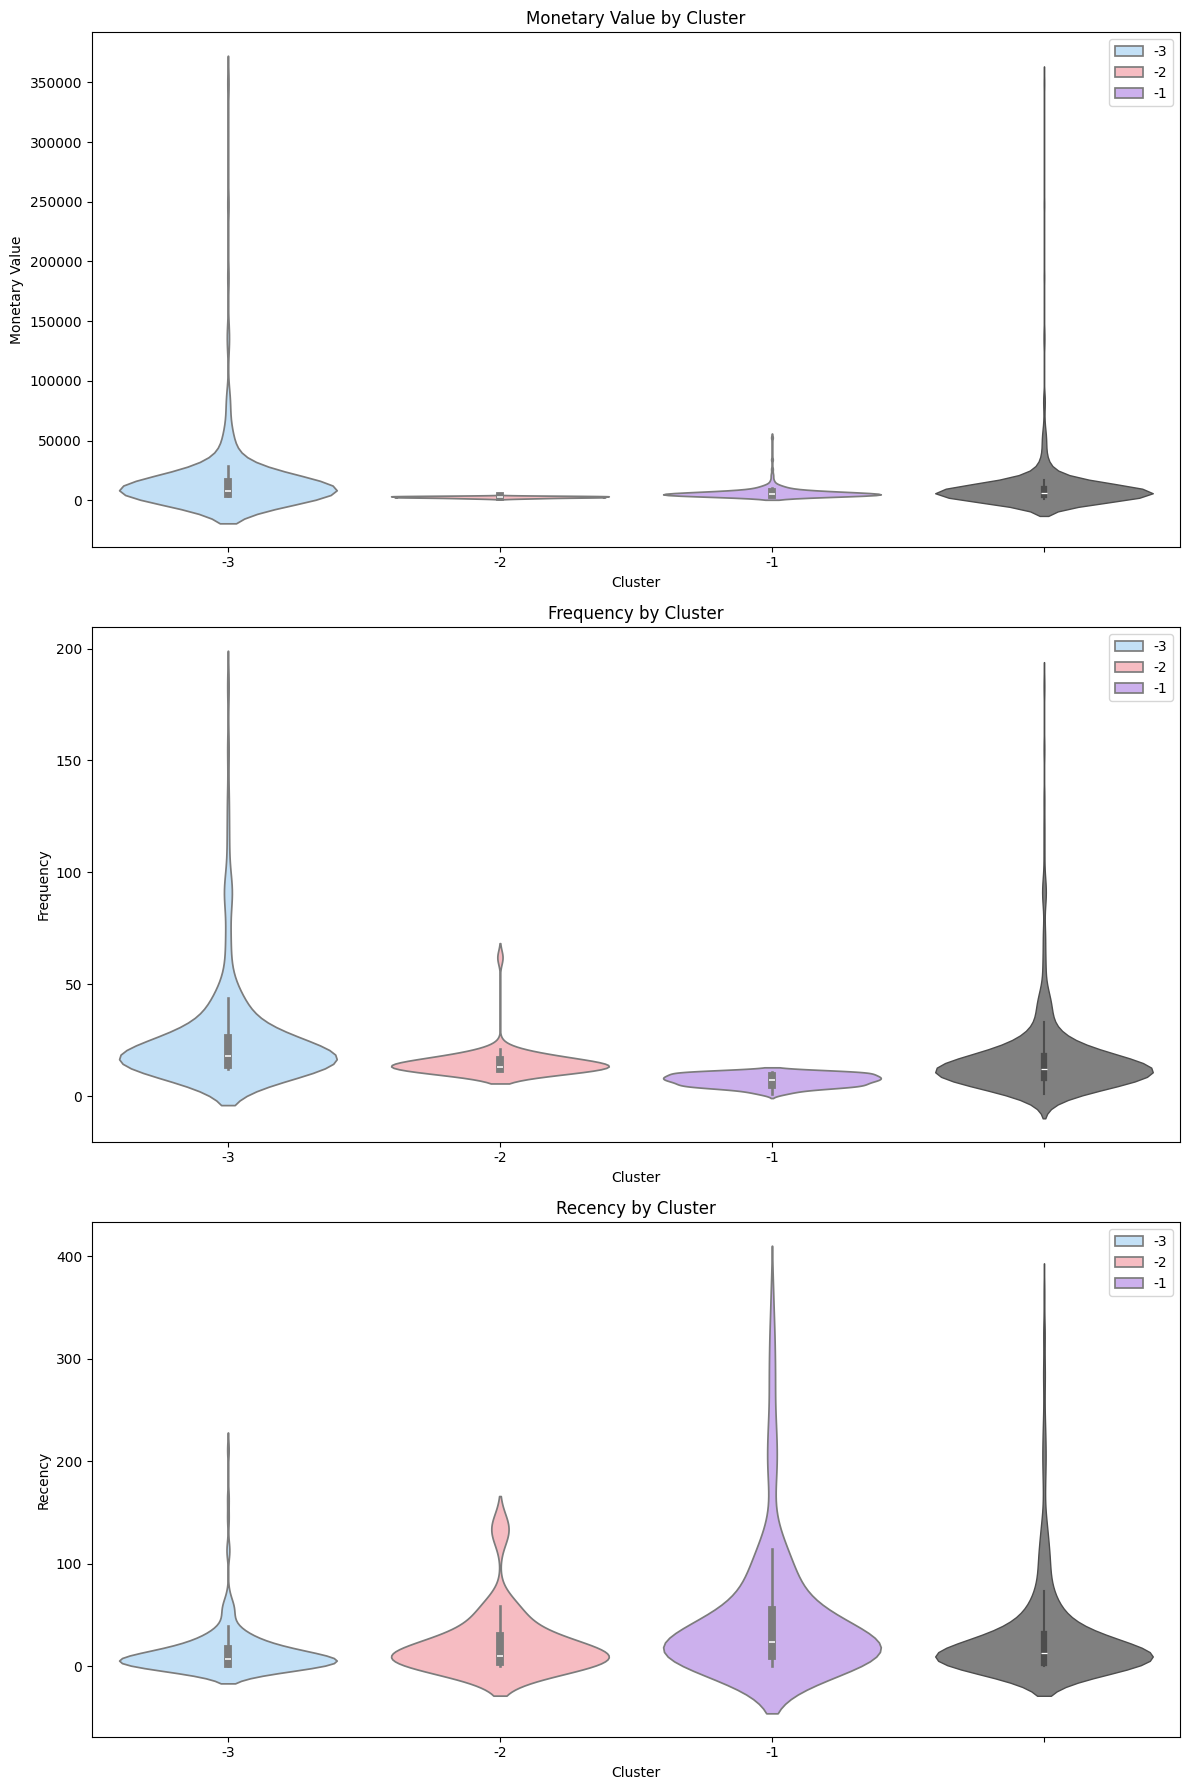

In [84]:
#violin plot

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x = outliers_df['Cluster'], y = outliers_df['Monetary_Value'], palette = cluster_colors, hue = outliers_df["Cluster"])
sns.violinplot(y = outliers_df['Monetary_Value'], color = 'gray', linewidth = 1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x = outliers_df['Cluster'], y = outliers_df['Frequency'], palette = cluster_colors, hue = outliers_df["Cluster"])
sns.violinplot(y = outliers_df['Frequency'], color = 'gray', linewidth = 1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x = outliers_df['Cluster'], y = outliers_df['Recency'], palette = cluster_colors, hue = outliers_df["Cluster"])
sns.violinplot(y = outliers_df['Recency'], color = 'gray', linewidth = 1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


1. Cluster -3: "Delight" 
The most valuable outliers, with extreme spending and frequent purchases. the focus should be to provide special "loyalty discounts" and other personalised offers.

2. Cluster -2: "Upsell"
Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities. Implementing loyalty programs or bundling deals could encourage higher spending per visit.

3. Cluster -1: "Pamper"
Their purchases are large but infrequent. The focus should be on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

In [86]:
fully_clustered_df = pd.concat([non_outliers_df, outliers_df])

fully_clustered_df

,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,2
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [89]:
# providing lables to all clusters
cluster_labels = {
    0: "LOYALS",
    1: "RE-ENGAGE",
    2: "RETAIN",
    3: "NURTURE",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}


fully_clustered_df['Cluster Label'] = fully_clustered_df['Cluster'].map(cluster_labels)

In [90]:
fully_clustered_df

,Customer ID,Monetary_Value,Frequency,Last_Invoice_Date,Recency,Cluster,Cluster Label
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,2,RETAIN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,3,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,2,RETAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,3,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT
